Default: 85968.82402944565
Virtual: 51211.54229903221
Result: 81115.98892402649
Accuracy: 0.9016393442622951


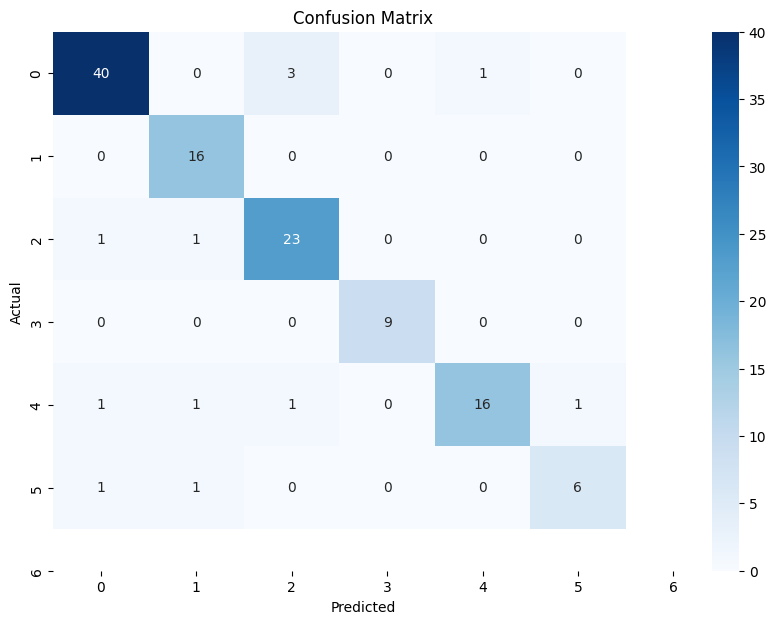

In [1]:
from gbd_core.api import GBD
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from helpers import * 
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns

with open('../classbuilding/configurations_to_families.txt', 'r') as file:
    lines = file.readlines()




feat = get_available_features()
# Display the lines
configs = []
allfams = []
for line in lines:
    config, fams = line.strip().split(", Families: ")
    fams = fams.split(", ")
    allfams.append(fams)
    configs.append(config)

data = get_dataset_by_fams(allfams)

df = pd.read_csv("top40.csv")

min_time_config = df.loc[df.groupby('key')['time'].idxmin()]

#print(min_time_config[min_time_config['time'] > 1800.0])
min_time_config = min_time_config[min_time_config['time'] <= 1800.0]

data = data[data['hash'].isin(min_time_config['key'])]

#print(data[['index', 'family']])
default, virtual, results, acc = (0,0,0,0)

X_train, X_test, y_train, y_test = train_test_split(data[feat + ['hash']], data['index'], test_size=0.2, random_state=10)#, stratify=data['index'])
model = RandomForestClassifier()
model.fit(X_train[feat], y_train)
y_pred = model.predict(X_test[feat])
insts = X_test['hash'].tolist()
predictions_df = pd.DataFrame(list(zip(X_test["hash"], y_pred)), columns=["hash", "predicted_index"])
default += getDefault(insts)
virtual += getVirtual(insts, configs)
results += eval(predictions_df, configs)
acc += accuracy_score(y_test, y_pred)
    #print("Default: {}".format(getDefault(insts)))
    #print("Virtual: {}".format(getVirtual(insts, configs)))
    #print("Result: {}".format(eval(predictions_df, configs)))
#
    #print("Accuracy:", accuracy_score(y_test, y_pred))

print("Default: {}".format(default))
print("Virtual: {}".format(virtual))
print("Result: {}".format(results))

print("Accuracy:", acc)

import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#with open('famcluster10.txt', 'w') as f:
#    for config in configs:
#        f.write(f"{config}\n")
#
#with open('random_forest_famcluster10.pkl', 'wb') as model_file:
#    pickle.dump(model, model_file)


Default: 82557.5519285202
Virtual: 54641.80245709419
Result: 80818.7917752266
Accuracy: 0.9098360655737705


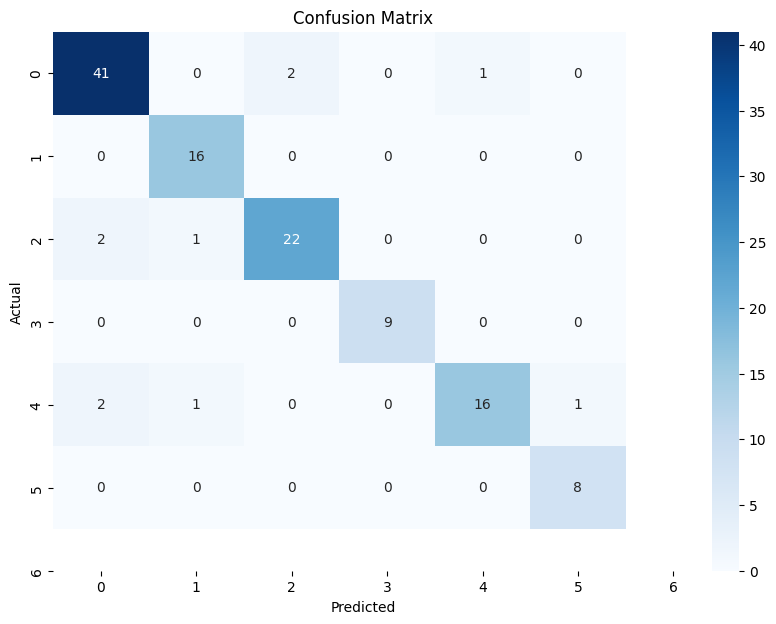

In [4]:
from gbd_core.api import GBD
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from helpers import * 
import pickle

with open('../classbuilding/configurations_to_families.txt', 'r') as file:
    lines = file.readlines()


feat = get_available_features()
# Display the lines
configs = []
allfams = []
for line in lines:
    config, fams = line.strip().split(", Families: ")
    fams = fams.split(", ")
    allfams.append(fams)
    configs.append(config)

data = get_dataset_by_fams(allfams)

df = pd.read_csv("top40.csv")

min_time_config = df.loc[df.groupby('key')['time'].idxmin()]

#print(min_time_config[min_time_config['time'] > 1800.0])
min_time_config = min_time_config[min_time_config['time'] <= 1800.0]

data = data[data['hash'].isin(min_time_config['key'])]

#print(data[['index', 'family']])
default, virtual, results, acc = (0,0,0,0)
X_train, X_test, y_train, y_test = train_test_split(data[feat + ['hash']], data['index'], test_size=0.2, random_state=10, stratify=data['index'])
model = RandomForestClassifier()
model.fit(X_train[feat], y_train)
y_pred = model.predict(X_test[feat])
insts = X_test['hash'].tolist()
predictions_df = pd.DataFrame(list(zip(X_test["hash"], y_pred)), columns=["hash", "predicted_index"])



print("Default: {}".format(getDefault(insts)))
print("Virtual: {}".format(getVirtual(insts, configs)))
print("Result: {}".format(eval(predictions_df, configs)))

print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Cross-validation scores: [0.86885246 0.90163934 0.95081967 0.85123967 0.90909091]
Mean cross-validation score: 0.8963284107844466
Default: 82557.5519285202
Virtual: 54641.80245709419
Result: 76598.00211381912
Accuracy: 0.9180327868852459


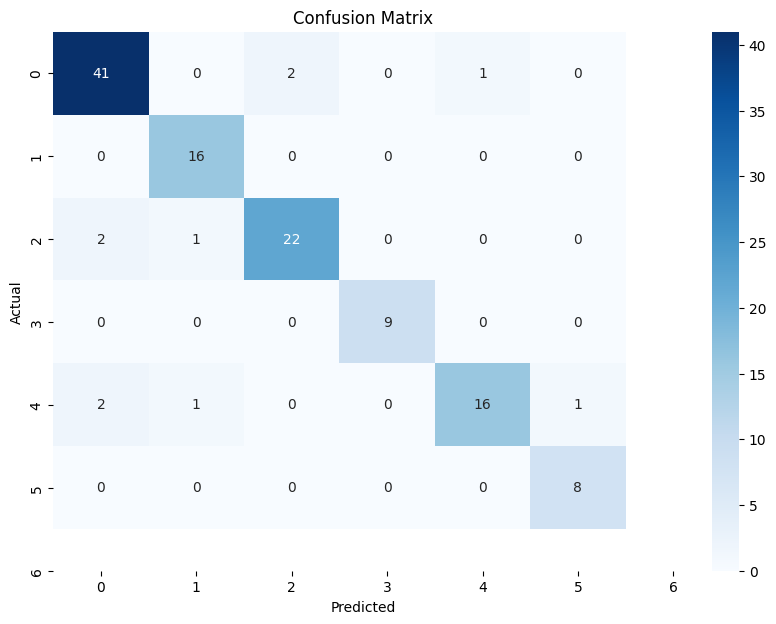

In [6]:
from gbd_core.api import GBD
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from helpers import * 
import pickle
from sklearn.model_selection import cross_val_score

with open('../classbuilding/configurations_to_families.txt', 'r') as file:
    lines = file.readlines()


feat = get_available_features()
# Display the lines
configs = []
allfams = []
for line in lines:
    config, fams = line.strip().split(", Families: ")
    fams = fams.split(", ")
    allfams.append(fams)
    configs.append(config)

data = get_dataset_by_fams(allfams)

df = pd.read_csv("top40.csv")

min_time_config = df.loc[df.groupby('key')['time'].idxmin()]

#print(min_time_config[min_time_config['time'] > 1800.0])
min_time_config = min_time_config[min_time_config['time'] <= 1800.0]

data = data[data['hash'].isin(min_time_config['key'])]

#print(data[['index', 'family']])
default, virtual, results, acc = (0,0,0,0)
X_train, X_test, y_train, y_test = train_test_split(data[feat + ['hash']], data['index'], test_size=0.2, random_state=10, stratify=data['index'])
model = RandomForestClassifier()
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, data[feat], data['index'], cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())




model.fit(X_train[feat], y_train)
y_pred = model.predict(X_test[feat])
insts = X_test['hash'].tolist()
predictions_df = pd.DataFrame(list(zip(X_test["hash"], y_pred)), columns=["hash", "predicted_index"])



print("Default: {}".format(getDefault(insts)))
print("Virtual: {}".format(getVirtual(insts, configs)))
print("Result: {}".format(eval(predictions_df, configs)))

print("Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
